# Homework - 1

In [ ]:
import math
import numpy as np
from scipy.optimize import fsolve

def expected_links(N, p):
    return p * N * (N - 1) / 2

def critical_probability(N):
    return math.log(N) / N

def network_regime(N, p):
    pc = critical_probability(N)
    if p < pc:
        return "Subcritical"
    elif p > pc:
        return "Supercritical"
    else:
        return "Critical"

def solve_Ncr(p):
    def equation(N):
        return p - math.log(N) / N
    return fsolve(equation, 1000)[0]

def average_degree(N, p):
    return p * (N - 1)

def average_distance(N, k_avg):
    return math.log(N) / math.log(k_avg)

def degree_distribution(k, lambda_val):
    return (math.exp(-lambda_val) * lambda_val**k) / math.factorial(k)

# Given parameters
N = 3000
p = 1e-3

# 1. Expected number of links
L_avg = expected_links(N, p)
print(f"1. Expected number of links: {L_avg:.2f}")
print()

# 2. Network regime
regime = network_regime(N, p)
print(f"2. Network regime: {regime}")
print()

# 3. Critical probability
pc = critical_probability(N)
print(f"3. Critical probability: {pc:.6f}")
print()

# 4. Number of nodes for one component
N_cr = solve_Ncr(p)
print(f"4. Number of nodes for one component: {N_cr:.2f}")
print()

# 5. Average degree and distance for the network in (d)
k_cr_avg = average_degree(N_cr, p)
d_avg = average_distance(N_cr, k_cr_avg)
print(f"5. For the network in (d):")
print(f"   \tAverage degree: {k_cr_avg:.2f}")
print(f"   \tAverage distance: {d_avg:.2f}")
print()

# 6. Degree distribution
lambda_val = average_degree(N, p)
k_values = range(20)  # Calculate for k = 0 to 19
pk_values = [degree_distribution(k, lambda_val) for k in k_values]

print("6. Degree distribution:")
for k, pk in zip(k_values, pk_values):
    print(f"   P({k}) = {pk:.6f}")

1. Expected number of links: 4498.50

2. Network regime: Subcritical

3. Critical probability: 0.002669

4. Number of nodes for one component: 9118.01

5. For the network in (d):
   	Average degree: 9.12
   	Average distance: 4.13

6. Degree distribution:
   P(0) = 0.049837
   P(1) = 0.149461
   P(2) = 0.224116
   P(3) = 0.224042
   P(4) = 0.167975
   P(5) = 0.100752
   P(6) = 0.050359
   P(7) = 0.021575
   P(8) = 0.008088
   P(9) = 0.002695
   P(10) = 0.000808
   P(11) = 0.000220
   P(12) = 0.000055
   P(13) = 0.000013
   P(14) = 0.000003
   P(15) = 0.000001
   P(16) = 0.000000
   P(17) = 0.000000
   P(18) = 0.000000
   P(19) = 0.000000


<ipython-input-1-b788d92fd847>:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return p - math.log(N) / N


# Homework - 2

In [ ]:
import numpy as np
import networkx as nx

def create_circular_network(N, m):
    G = nx.Graph()
    G.add_nodes_from(range(N))
    for i in range(N):
        for j in range(1, m + 1):
            G.add_edge(i, (i + j) % N)
            G.add_edge(i, (i - j) % N)
    return G

def average_clustering_coefficient(N, m):
    # For this specific network structure, we can calculate directly
    if m == 1:
        return 0
    return (3 * (m - 1)) / (2 * (2 * m - 1))

def average_shortest_path(G):
    return nx.average_shortest_path_length(G)

def theoretical_average_shortest_path(N, m):
    return N / (4 * m) + 1/2

# Parameters
N = 20
m = 3

# Create the network
G = create_circular_network(N, m)

# Calculate average clustering coefficient
C_avg = average_clustering_coefficient(N, m)
print(f"Average clustering coefficient: {C_avg:.4f}")

# Calculate average shortest path
d_avg = average_shortest_path(G)
print(f"Average shortest path: {d_avg:.4f}")

# Theoretical average shortest path
d_avg_theo = theoretical_average_shortest_path(N, m)
print(f"Theoretical average shortest path: {d_avg_theo:.4f}")

# Calculate for large N
N_large = 10000
C_avg_large = average_clustering_coefficient(N_large, m)
d_avg_large_theo = theoretical_average_shortest_path(N_large, m)

print(f"\nFor N = {N_large}:")
print(f"Average clustering coefficient: {C_avg_large:.4f}")
print(f"Theoretical average shortest path: {d_avg_large_theo:.4f}")

Average clustering coefficient: 0.6000
Average shortest path: 2.1053
Theoretical average shortest path: 2.1667

For N = 10000:
Average clustering coefficient: 0.6000
Theoretical average shortest path: 833.8333


# Homework - 3

**Explanation of the "paradox"**:
The "paradox" that a node's friends have more friends than the node itself, on average, can be explained by several factors:


*   Sampling bias: When you select a random neighbor of a node, you're more likely to encounter high-degree nodes. This is because high-degree nodes have more connections and thus appear as neighbors more frequently.
*   Degree heterogeneity: In networks with heterogeneous degree distributions, like power-law networks, there are many low-degree nodes and few high-degree nodes. The high-degree nodes, even though fewer in number, significantly influence the average neighbor degree.



*   Mathematical inequality: For any degree distribution, 〈k^2〉 ≥ 〈k〉^2. This inequality directly leads to 〈knn〉 = 〈k^2〉 / 〈k〉 ≥ 〈k〉, meaning the average neighbor degree is always greater than or equal to the average degree.
*   Influence of hubs: In scale-free networks (like the one in this example), "hub" nodes with very high degrees have a disproportionate effect on network properties. These hubs are likely to be neighbors to many nodes, pulling up the average neighbor degree.


*   Asymmetry in friendships: In the context of social networks, this paradox suggests that most people have fewer friends than their friends have, on average. This is because people with many friends are more likely to be someone's friend.

This "paradox" is not actually a logical contradiction, but rather a counterintuitive statistical property of networks, especially those with skewed degree distributions like power-law networks. It's a fundamental feature of network topology and has implications in various fields, from social network analysis to epidemiology.

In [ ]:
import numpy as np

def power_law_calculations(N, gamma, k_min, k_max):
    # Create degree array
    k = np.arange(k_min, k_max + 1)

    # Calculate pk
    pk = k**(-gamma)
    pk /= pk.sum()  # Normalize

    # Calculate average degree
    k_avg = np.sum(k * pk)

    # Calculate average squared degree
    k_squared_avg = np.sum(k**2 * pk)

    # Calculate normalization factor A
    A = k_avg / k_squared_avg

    # Calculate average neighbor degree
    k_nn_avg = k_squared_avg / k_avg

    return k_avg, k_nn_avg, A

# Parameters
N = 10**4
gamma = 2.3
k_min = 1
k_max = 1000

k_avg, k_nn_avg, A = power_law_calculations(N, gamma, k_min, k_max)

print(f"Average degree 〈k〉: {k_avg:.2f}")
print(f"Average neighbor degree 〈knn〉: {k_nn_avg:.2f}")
print(f"Normalization factor A: {A:.4f}")

Average degree 〈k〉: 2.45
Average neighbor degree 〈knn〉: 50.96
Normalization factor A: 0.0196


# Homework - 4

<ipython-input-4-81d800a2b0d9>:33: RuntimeWarning: invalid value encountered in scalar divide
  return gamma(k + A) * gamma(2 + A/m) / (gamma(A) * gamma(k + 2 + A/m))
<ipython-input-4-81d800a2b0d9>:68: RuntimeWarning: divide by zero encountered in log
  coeffs = np.polyfit(np.log(k_fit), np.log(y_fit), 1)


Theoretical power-law exponent: 1.50
Estimated empirical power-law exponent: nan


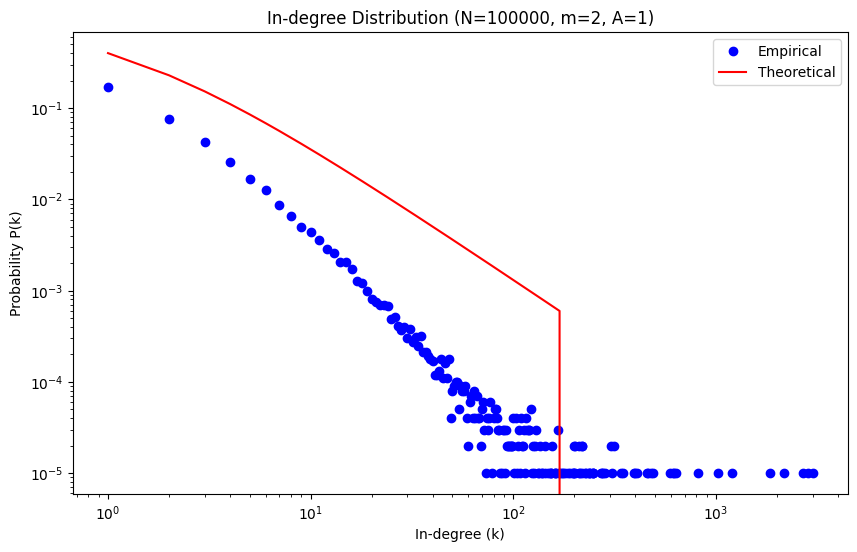


Out-degree distribution:
All nodes have out-degree 2


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma
from collections import Counter

def modified_barabasi_albert(N, m, A):
    # Initialize network with m nodes
    in_degrees = np.zeros(N, dtype=int)
    for i in range(m, N):
        # Calculate attachment probabilities
        if i == m or (A == 0 and in_degrees[:i].sum() == 0):
            # Uniform distribution for initial nodes or when all in-degrees are zero
            probabilities = np.ones(i) / i
        else:
            if A == 0:
                probabilities = in_degrees[:i] / in_degrees[:i].sum()
            else:
                probabilities = (in_degrees[:i] + A) / (in_degrees[:i].sum() + i * A)

        # Ensure probabilities are valid
        probabilities = np.nan_to_num(probabilities)
        probabilities /= probabilities.sum()

        # Choose m nodes to connect to
        targets = np.random.choice(i, size=m, replace=False, p=probabilities)

        # Update in-degrees
        in_degrees[targets] += 1

    return in_degrees

def theoretical_distribution(k, m, A):
    return gamma(k + A) * gamma(2 + A/m) / (gamma(A) * gamma(k + 2 + A/m))

# Set parameters
N = 100000  # Number of nodes
m = 2       # Number of links for each new node
A = 1       # Constant A in the attachment probability

# Generate network
in_degrees = modified_barabasi_albert(N, m, A)

# Calculate degree distribution
degree_counts = Counter(in_degrees)
max_degree = max(degree_counts.keys())

# Prepare data for plotting
x = np.arange(0, max_degree + 1)
y_empirical = [degree_counts.get(k, 0) / N for k in x]
y_theoretical = [theoretical_distribution(k, m, A) for k in x]

# Plot results
plt.figure(figsize=(10, 6))
plt.loglog(x[1:], y_empirical[1:], 'bo', label='Empirical')
plt.loglog(x[1:], y_theoretical[1:], 'r-', label='Theoretical')
plt.xlabel('In-degree (k)')
plt.ylabel('Probability P(k)')
plt.legend()
plt.title(f'In-degree Distribution (N={N}, m={m}, A={A})')

# Calculate and print the power-law exponent
gamma_theoretical = 2 + A * (1/m - 1)
print(f"Theoretical power-law exponent: {gamma_theoretical:.2f}")

# Estimate empirical power-law exponent (for k > 10)
k_fit = x[x > 10]
y_fit = np.array(y_empirical)[x > 10]
coeffs = np.polyfit(np.log(k_fit), np.log(y_fit), 1)
gamma_empirical = -coeffs[0]
print(f"Estimated empirical power-law exponent: {gamma_empirical:.2f}")

plt.show()

# Out-degree distribution
print("\nOut-degree distribution:")
print(f"All nodes have out-degree {m}")

# Programming Assignment 1

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12296 (\N{LEFT ANGLE BRACKET}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 12297 (\N{RIGHT ANGLE BRACKET}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


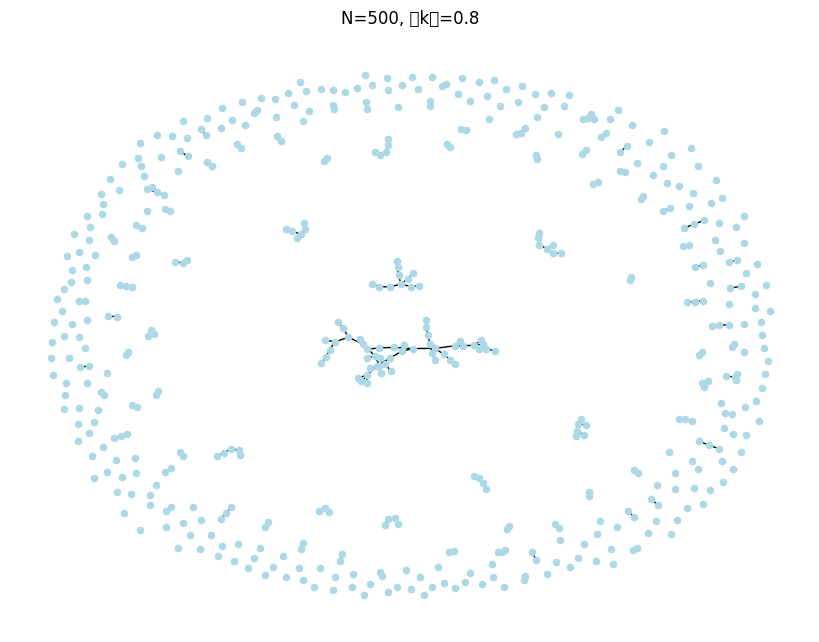

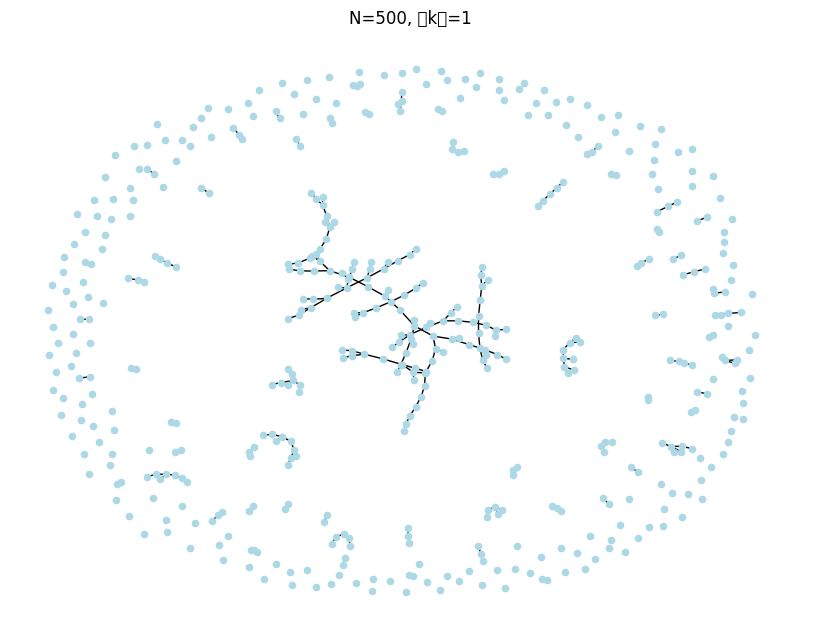

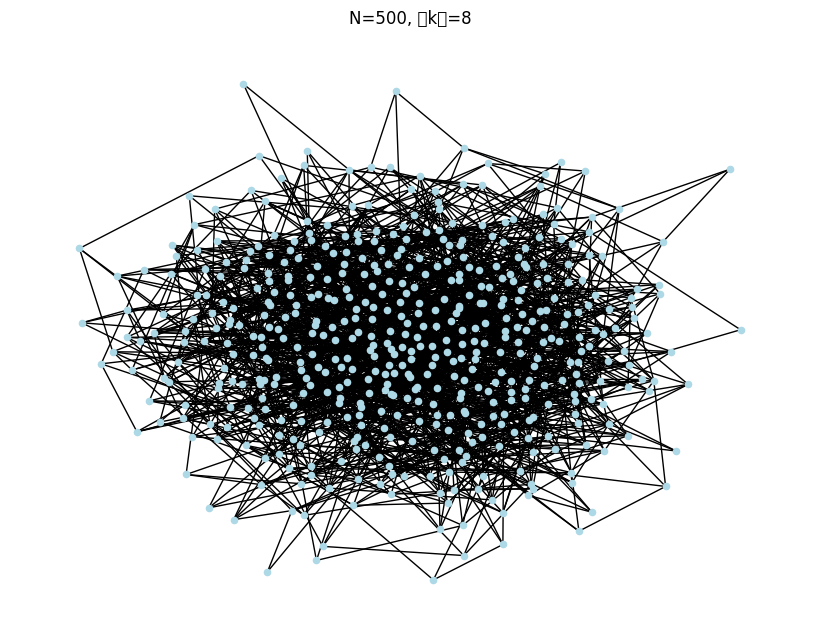

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def generate_and_visualize_network(N, k_avg):
    p = k_avg / (N - 1)
    G = nx.erdos_renyi_graph(N, p)
    plt.figure(figsize=(8, 6))
    nx.draw(G, node_size=20, node_color='lightblue', with_labels=False)
    plt.title(f"N={N}, 〈k〉={k_avg}")
    plt.show()

N = 500
for k_avg in [0.8, 1, 8]:
    generate_and_visualize_network(N, k_avg)

Network with red and blue nodes:


Calculating average degrees:

In [ ]:
def calculate_degrees(N, p, q):
    k_blue_avg = p * (N - 1)
    k_full_avg = p * (N - 1) + q * N
    return k_blue_avg, k_full_avg

N = 1000  # Example value
p = 0.01  # Example value
q = 0.005  # Example value

k_blue_avg, k_full_avg = calculate_degrees(N, p, q)
print(f"Average degree of blue subnetwork: {k_blue_avg:.2f}")
print(f"Average degree of full network: {k_full_avg:.2f}")

Average degree of blue subnetwork: 9.99
Average degree of full network: 14.99


Minimal p and q for one component:
    
    
For a G(N, p) model, the critical probability for connectivity is approximately ln(N) / N. In this case, we need:

In [ ]:
import math

def minimal_probabilities(N):
    p_min = math.log(N) / N
    q_min = math.log(2*N) / (2*N)
    return p_min, q_min

p_min, q_min = minimal_probabilities(N)
print(f"Minimal p: {p_min:.4f}")
print(f"Minimal q: {q_min:.4f}")

Minimal p: 0.0069
Minimal q: 0.0038


Network with purple nodes:

a. Fraction of purple nodes for interactivity:

In [ ]:
def fraction_purple_for_interactivity(N, p):
    k_avg = p * (N - 1)
    f_min = 1 / math.sqrt(k_avg)
    return f_min

N = 1000
p = 0.01
f_min = fraction_purple_for_interactivity(N, p)
print(f"Minimum fraction of purple nodes: {f_min:.4f}")

Minimum fraction of purple nodes: 0.3164


# Programming Assignment 2:

Generating power-law networks and analyzing multi-links and self-loops:

In [ ]:
import networkx as nx
import numpy

def generate_network(N, gamma):
    degree_distribution = np.random.zipf(gamma, N)
    if sum(degree_distribution) % 2 != 0:
        degree_distribution[np.argmax(degree_distribution)] -= 1

    G = nx.configuration_model(degree_distribution)
    G_simple = nx.Graph(G)
    G_simple.remove_edges_from(nx.selfloop_edges(G_simple))

    return G, G_simple

def calculate_percentage(G, G_simple):
    num_edges = G.number_of_edges()
    num_multi_links = num_edges - G_simple.number_of_edges()

    num_self_loop = sum(1 for u,v in G.edges() if u == v)

    per_multi_links = (num_multi_links/num_edges)*100
    per_self_loop = (num_self_loop/num_edges)*100

    return per_multi_links, per_self_loop

def print_results(N_values, gamma_values):
    for gamma in gamma_values:
        print(f"Results for γ = {gamma}:")

        for N in N_values:
            G, G_simple = generate_network(N, gamma)
            perc_multi_links, perc_self_loops = calculate_percentage(G, G_simple)

            print(f"Network Size (N): {N}")
            print(f"  Percentage of Multi-links: {perc_multi_links:.2f}%")
            print(f"  Percentage of Self-loops: {perc_self_loops:.2f}%\n")

N_values = [10**3, 10**4, 10**5]
gamma_values = [2.2, 3.0]
print_results(N_values, gamma_values)

Results for γ = 2.2:
Network Size (N): 1000
  Percentage of Multi-links: 14.45%
  Percentage of Self-loops: 2.85%

Network Size (N): 10000
  Percentage of Multi-links: 7.45%
  Percentage of Self-loops: 0.47%

Network Size (N): 100000
  Percentage of Multi-links: 5.77%
  Percentage of Self-loops: 0.18%

Results for γ = 3.0:
Network Size (N): 1000
  Percentage of Multi-links: 0.69%
  Percentage of Self-loops: 0.55%

Network Size (N): 10000
  Percentage of Multi-links: 0.30%
  Percentage of Self-loops: 0.10%

Network Size (N): 100000
  Percentage of Multi-links: 0.00%
  Percentage of Self-loops: 0.00%



N = 100, γ = 1.56
N = 1000, γ = 1.85
N = 10000, γ = 2.03


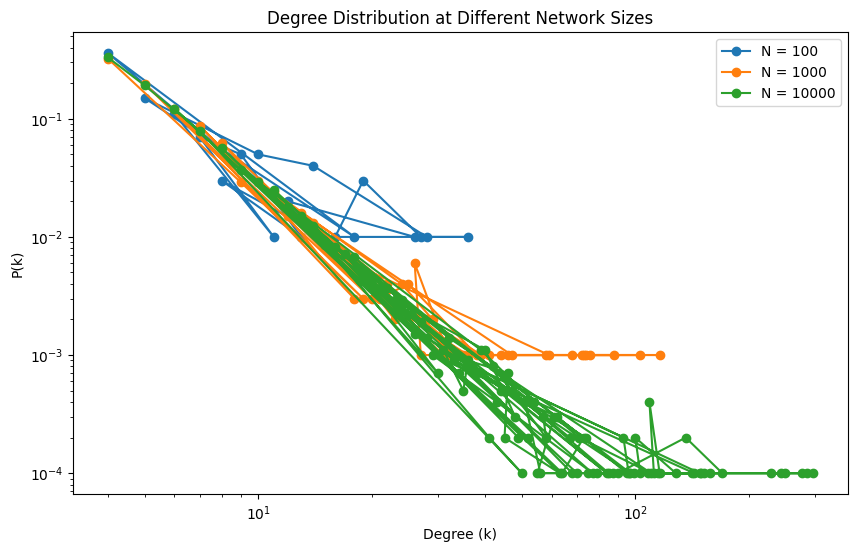

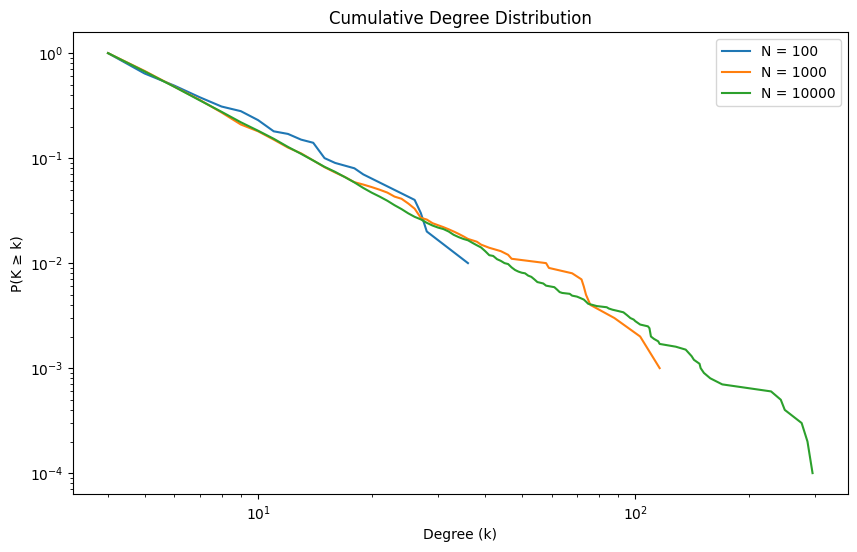

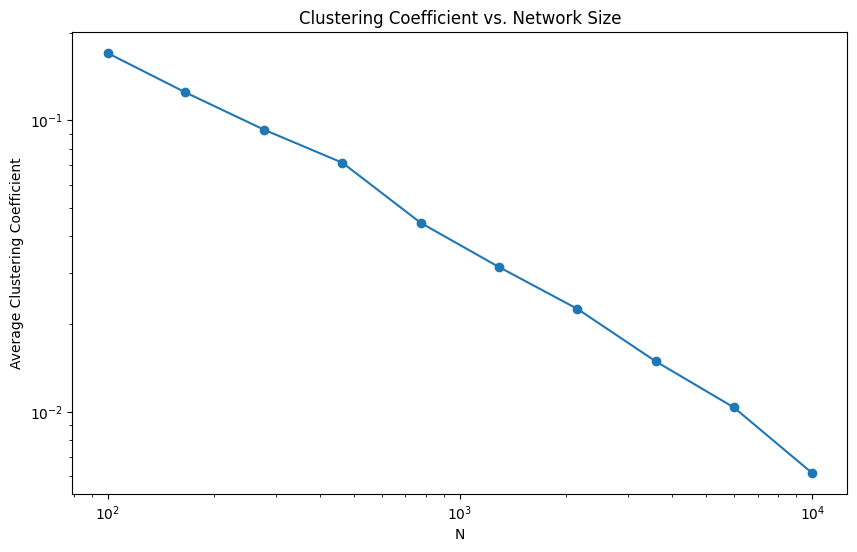

In [ ]:
def generate_ba_network(N, m):
    G = nx.complete_graph(m)
    while G.number_of_nodes() < N:
        G = nx.barabasi_albert_graph(G.number_of_nodes() + 1, m, initial_graph=G)
    return G

def measure_degree_distribution(G):
    degrees = [d for n, d in G.degree()]
    return Counter(degrees)

def fit_power_law(x, y):
    logx = np.log(x)
    logy = np.log(y)
    coeffs = np.polyfit(logx, logy, 1)
    return -coeffs[0]

def plot_degree_distribution(distributions, N_values):
    plt.figure(figsize=(10, 6))
    for N, dist in zip(N_values, distributions):
        x = list(dist.keys())
        y = [dist[k] / sum(dist.values()) for k in x]
        plt.loglog(x, y, 'o-', label=f'N = {N}')

        # Fit power-law
        gamma = fit_power_law(x, y)
        print(f"N = {N}, γ = {gamma:.2f}")

    plt.xlabel('Degree (k)')
    plt.ylabel('P(k)')
    plt.legend()
    plt.title('Degree Distribution at Different Network Sizes')
    plt.show()

def plot_cumulative_distribution(distributions, N_values):
    plt.figure(figsize=(10, 6))
    for N, dist in zip(N_values, distributions):
        x = sorted(dist.keys())
        y = [sum(dist[k] for k in dist if k >= degree) / sum(dist.values()) for degree in x]
        plt.loglog(x, y, '-', label=f'N = {N}')

    plt.xlabel('Degree (k)')
    plt.ylabel('P(K ≥ k)')
    plt.legend()
    plt.title('Cumulative Degree Distribution')
    plt.show()

def measure_clustering_coefficient(N_values, m):
    clustering_coeffs = []
    for N in N_values:
        G = generate_ba_network(N, m)
        clustering_coeffs.append(nx.average_clustering(G))

    plt.figure(figsize=(10, 6))
    plt.loglog(N_values, clustering_coeffs, 'o-')
    plt.xlabel('N')
    plt.ylabel('Average Clustering Coefficient')
    plt.title('Clustering Coefficient vs. Network Size')
    plt.show()

# Generate BA network and analyze
N_values = [10**2, 10**3, 10**4]
m = 4

distributions = []
for N in N_values:
    G = generate_ba_network(N, m)
    distributions.append(measure_degree_distribution(G))

plot_degree_distribution(distributions, N_values)
plot_cumulative_distribution(distributions, N_values)

# Measure clustering coefficient
N_values_clustering = np.logspace(2, 4, 10).astype(int)
measure_clustering_coefficient(N_values_clustering, m)